## notebook assess the massql query for identifying carnitines
- based on diagnostic peaks and neutral loss defined in the respective v_boxplot_carnitines notebooks

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

In [3]:
massql_query_output = pd.read_csv('/home/jovyan/work/notebooks/outputs/massql_carnitine_query_peaks_nl.csv',sep=',', index_col='scan')

In [4]:
massql_query_output

,precmz,ms1scan,rt,charge,i,i_norm,mslevel,i_norm_ms1,Compound_Name,Adduct,library_membership
scan,,,,,,,,,,,
CCMSLIB00000221013,162.113,0,0,1,2.058000e+03,1,2,NaN,ReSpect:PT102690 L-Carnitine h,[M+H],RESPECT
CCMSLIB00000221015,162.113,0,0,1,3.170000e+03,1,2,NaN,ReSpect:PT102693 L-Carnitine h,[M+H],RESPECT
CCMSLIB00000221337,162.113,0,0,1,2.061000e+03,1,2,NaN,ReSpect:PT107170 L-Carnitine|V,[M+H],RESPECT
CCMSLIB00000222989,162.113,0,0,1,5.995100e+03,1,2,NaN,Massbank:PR100159 L-Carnitine|,[M+H]+,MASSBANK
CCMSLIB00000222990,162.113,0,0,1,3.706970e+02,1,2,NaN,Massbank:PR100160 L-Carnitine|,[M+H]+,MASSBANK
...,...,...,...,...,...,...,...,...,...,...,...
CCMSLIB00006683989,162.112,0,0,1,5.146000e+02,1,2,NaN,NaN,NaN,NaN
CCMSLIB00006684275,344.280,0,0,1,1.509000e+02,1,2,NaN,NaN,NaN,NaN
CCMSLIB00006686014,162.112,0,0,1,4.952127e+08,1,2,NaN,NaN,NaN,NaN


In [5]:
massql_query_ids = massql_query_output.index.to_list()

### match massql data with original GNPS data to fill in missing metadata

In [6]:
# from v_get_ALL_GNPS_input_library.ipynb

input_library_full_df_loaded = pd.read_parquet('/home/jovyan/work/notebooks/outputs/ALL_GNPS_input_library.gzip')

In [7]:
input_library_no_suspect_list = input_library_full_df_loaded[~input_library_full_df_loaded['library_membership'].str.contains('suspect',case=False,na=False)]

In [8]:
adduct_labels = ['M+H','[M+H]','[M+H]+']

In [9]:
input_library = input_library_no_suspect_list[input_library_no_suspect_list["Adduct"].isin(adduct_labels)]

In [10]:
len(input_library)

245648

In [53]:
massql_query_output_matched = input_library[input_library["spectrum_id"].isin(massql_query_ids)]

In [54]:
massql_query_output_matched

,spectrum_id,source_file,task,scan,ms_level,library_membership,spectrum_status,peaks_json,splash,submit_user,...,Ion_Mode,create_time,task_id,user_id,InChIKey_smiles,InChIKey_inchi,Formula_smiles,Formula_inchi,url,annotation_history
9475,CCMSLIB00005884289,madeleine.mgf,f92bb49bd6e64337b6cc3a154bb87d6b,1136,2,GNPS-LIBRARY,1,"[[50.167000,175.009995],[51.291000,1927.599976...",null-null-null-null,mwang87,...,Positive,2021-03-18 10:55:10.0,f92bb49bd6e64337b6cc3a154bb87d6b,null,PHIQHXFUZVPYII-ZCFIWIBFSA-N,,C7H15NO3,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '6645-46-1', ..."
9476,CCMSLIB00005884290,madeleine.mgf,f92bb49bd6e64337b6cc3a154bb87d6b,1137,2,GNPS-LIBRARY,1,"[[50.518299,6257.680176],[51.285301,5857.77002...",null-null-null-null,mwang87,...,Positive,2021-03-18 10:55:10.0,f92bb49bd6e64337b6cc3a154bb87d6b,null,PHIQHXFUZVPYII-ZCFIWIBFSA-N,,C7H15NO3,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '6645-46-1', ..."
9477,CCMSLIB00005884291,madeleine.mgf,f92bb49bd6e64337b6cc3a154bb87d6b,1138,2,GNPS-LIBRARY,1,"[[50.335499,173.570007],[52.941200,175.500000]...",null-null-null-null,mwang87,...,Positive,2021-03-18 10:55:10.0,f92bb49bd6e64337b6cc3a154bb87d6b,null,PHIQHXFUZVPYII-ZCFIWIBFSA-N,,C7H15NO3,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '6645-46-1', ..."
9478,CCMSLIB00005884292,madeleine.mgf,f92bb49bd6e64337b6cc3a154bb87d6b,1139,2,GNPS-LIBRARY,1,"[[51.347500,195.000000],[52.074001,2091.510010...",null-null-null-null,mwang87,...,Positive,2021-03-18 10:55:10.0,f92bb49bd6e64337b6cc3a154bb87d6b,null,PHIQHXFUZVPYII-ZCFIWIBFSA-N,,C7H15NO3,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '6645-46-1', ..."
9576,CCMSLIB00005884390,madeleine.mgf,f92bb49bd6e64337b6cc3a154bb87d6b,1237,2,GNPS-LIBRARY,1,"[[50.608002,74.110001],[50.686501,158.160004],...",null-null-null-null,mwang87,...,Positive,2021-03-18 10:55:10.0,f92bb49bd6e64337b6cc3a154bb87d6b,null,FUJLYHJROOYKRA-QGZVFWFLSA-N,,C19H37NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '25518-54-1',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560686,CCMSLIB00006683989,library_mgf.mgf,cbf7a3321fc2435bb2fccc544e58a335,3836,2,MONA,1,"[[41.039059,3.800000],[43.018051,41.099998],[4...",null-null-null-null,mpanitchpakdi,...,positive,2021-07-20 19:45:32.0,cbf7a3321fc2435bb2fccc544e58a335,null,PHIQHXFUZVPYII-ZCFIWIBFSA-N,None,C7H15NO3,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': 'N/A', 'Charg..."
560972,CCMSLIB00006684275,library_mgf.mgf,cbf7a3321fc2435bb2fccc544e58a335,4122,2,MONA,1,"[[57.033741,0.500000],[57.069820,1.400000],[60...",null-null-null-null,mpanitchpakdi,...,positive,2021-07-20 19:45:32.0,cbf7a3321fc2435bb2fccc544e58a335,null,FUJLYHJROOYKRA-QGZVFWFLSA-N,None,C19H37NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': 'N/A', 'Charg..."
568238,CCMSLIB00000221013,respect_8_1_2014_GNPS_peaks.mgf,819707e5bc284f80b9d421d106481dbb,6222,2,RESPECT,1,"[[60.082802,129.000000],[85.030502,257.000000]...",splash10-00fr-7900000000-7900000000,mwang87,...,Positive,2014-08-01 16:37:39.0,819707e5bc284f80b9d421d106481dbb,null,PHIQHXFUZVPYII-UHFFFAOYSA-N,PHIQHXFUZVPYII-ZCFIWIBFNA-N,C7H15NO3,C7H15NO3,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': '[M+H]', 'CAS_Number': '541-15-1',..."
568239,CCMSLIB00000221015,respect_8_1_2014_GNPS_peaks.mgf,819707e5bc284f80b9d421d106481dbb,6223,2,RESPECT,1,"[[57.033699,52.000000],[58.066101,426.000000],...",splash10-00fr-7900000000-7900000000,mwang87,...,Positive,2014-08-01 16:37:39.0,819707e5bc284f80b9d421d106481dbb,null,PHIQHXFUZVPYII-UHFFFAOYSA-N,PHIQHXFUZVPYII-ZCFIWIBFNA-N,C7H15NO3,C7H15NO3,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': '[M+H]', 'CAS_Number': '541-15-1',..."


In [72]:
input_library_full_df_loaded[input_library_full_df_loaded["spectrum_id"].isin(massql_query_ids)][input_library_full_df_loaded[input_library_full_df_loaded["spectrum_id"].isin(massql_query_ids)].Smiles == 'N/A'][['spectrum_id','Compound_Name']]

,spectrum_id,Compound_Name
545705,CCMSLIB00004712579,4-hydroxy-3-[(4-hydroxy-6-methyl-2-oxopyran-3-...
547006,CCMSLIB00004713880,"7-ethenyl-1,4a,7-trimethyl-3,4,6,8,8a,9,10,10a..."
550806,CCMSLIB00004717680,"(1S,2R,4S,9R,10R,14S,15S,17S)-9-(furan-3-yl)-1..."
551146,CCMSLIB00004718020,"[(2S,3R,4R,5R,6S)-2-[[(1aS,1bS,2S,5aR,6S,6aS)-..."
551162,CCMSLIB00004718036,"methyl (2R)-2-[(1S,3S,7R,8R,9R,12S,13R)-13-(fu..."
551494,CCMSLIB00004718368,"(2S,3R,4S,5S,6R)-2-[(2R,3R,4S,5S,6R)-4,5-dihyd..."
551550,CCMSLIB00004718424,"9,13-Dimethyl-17-oxo-14-(5-oxo-2,5-dihydro-3-f..."
551553,CCMSLIB00004718427,"9,13-Dimethyl-17-oxo-14-(5-oxo-2,5-dihydro-3-f..."
552136,CCMSLIB00004719010,"6-[[(2R,3R,6aR,6bS,8aS,12aS,14bR)-2-hydroxy-4,..."
552206,CCMSLIB00004719080,"[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxym..."


In [68]:
massql_query_output_matched_are_na_SMILES = massql_query_output_matched[massql_query_output_matched.Smiles == 'N/A']

In [69]:
massql_query_output_matched_are_na_SMILES[['spectrum_id','Compound_Name']]

,spectrum_id,Compound_Name
551494,CCMSLIB00004718368,"(2S,3R,4S,5S,6R)-2-[(2R,3R,4S,5S,6R)-4,5-dihyd..."
551553,CCMSLIB00004718427,"9,13-Dimethyl-17-oxo-14-(5-oxo-2,5-dihydro-3-f..."
552136,CCMSLIB00004719010,"6-[[(2R,3R,6aR,6bS,8aS,12aS,14bR)-2-hydroxy-4,..."
552206,CCMSLIB00004719080,"[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxym..."
552934,CCMSLIB00004719808,Palmitoylcarnitine
553023,CCMSLIB00004719897,Cholic Acid


### validating massql query output with known carnitine IDs
- from carnitines identified by substructure
- from carnitines by annotation

In [18]:
# from v_carnitines_M+H_substruct_df_for_manuscript.ipynb

library_df_w_carnitine_substruc = pd.read_csv('/home/jovyan/work/notebooks/outputs/library_df_w_carnitine_substruc.csv', sep=',')

In [19]:
# from v_carnitines_M+H_name_df_for_manuscript.ipynb

library_df_w_carnitine_name = pd.read_csv('/home/jovyan/work/notebooks/outputs/library_df_carnitine_case_insen_M+H.csv', sep=',')

In [55]:
massql_query_output_matched_SMILES = massql_query_output_matched['Smiles'].dropna().unique()

In [58]:
massql_query_output_matched_SMILES_no_na = np.delete(massql_query_output_matched_SMILES, np.where(massql_query_output_matched_SMILES == 'N/A'))

In [59]:
len(massql_query_output_matched_SMILES_no_na)

36

In [21]:
len(massql_query_output_matched_SMILES)

37

In [22]:
library_df_w_carnitine_substruc_SMILES = library_df_w_carnitine_substruc['Smiles'].dropna().unique()

In [23]:
len(library_df_w_carnitine_substruc_SMILES)

75

In [24]:
library_df_w_carnitine_name_SMILES = library_df_w_carnitine_name['Smiles'].dropna().unique()

In [25]:
len(library_df_w_carnitine_name_SMILES)

80

#### venn diagrams

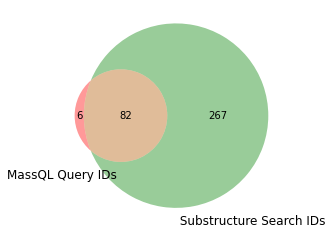

In [61]:
venn2([set(massql_query_output_matched['spectrum_id'].dropna().unique()), set(library_df_w_carnitine_substruc['spectrum_id'].dropna().unique())],
      set_labels = ('MassQL Query IDs ', ' Substructure Search IDs'))
plt.show()

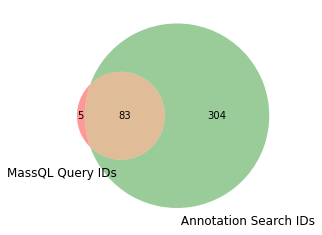

In [62]:
venn2([set(massql_query_output_matched['spectrum_id'].dropna().unique()), set(library_df_w_carnitine_name['spectrum_id'].dropna().unique())],
      set_labels = ('MassQL Query IDs ', ' Annotation Search IDs'))
plt.show()

In [78]:
set(library_df_w_carnitine_name['spectrum_id'].dropna().unique())-set(library_df_w_carnitine_substruc['spectrum_id'].dropna().unique())-set(massql_query_output_matched['spectrum_id'].dropna().unique())

{'CCMSLIB00000216197',
 'CCMSLIB00000216199',
 'CCMSLIB00000216201',
 'CCMSLIB00000216407',
 'CCMSLIB00000216409',
 'CCMSLIB00000216411',
 'CCMSLIB00000216629',
 'CCMSLIB00000216631',
 'CCMSLIB00000216633',
 'CCMSLIB00000216635',
 'CCMSLIB00000216638',
 'CCMSLIB00000221107',
 'CCMSLIB00000577974',
 'CCMSLIB00004684498',
 'CCMSLIB00004684499',
 'CCMSLIB00004691403',
 'CCMSLIB00004691404',
 'CCMSLIB00004691405',
 'CCMSLIB00004719092',
 'CCMSLIB00004719100',
 'CCMSLIB00004719106',
 'CCMSLIB00004719807',
 'CCMSLIB00004719809',
 'CCMSLIB00005464019',
 'CCMSLIB00005720412',
 'CCMSLIB00005884227',
 'CCMSLIB00005884228',
 'CCMSLIB00005884229',
 'CCMSLIB00005884230',
 'CCMSLIB00005884231',
 'CCMSLIB00005884232',
 'CCMSLIB00006679523',
 'CCMSLIB00006679781',
 'CCMSLIB00006681727',
 'CCMSLIB00006681988',
 'CCMSLIB00006682560',
 'CCMSLIB00006682832',
 'CCMSLIB00006683333',
 'CCMSLIB00006683988'}

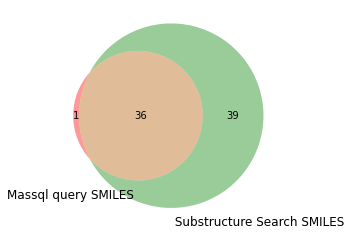

In [63]:
venn2([set(massql_query_output_matched['Smiles'].dropna().unique()), set(library_df_w_carnitine_substruc['Smiles'].dropna().unique())],
      set_labels = ('Massql query SMILES ', ' Substructure Search SMILES'))
plt.show()

In [64]:
set(massql_query_output_matched['Smiles'].dropna().unique())-set(library_df_w_carnitine_substruc['Smiles'].dropna().unique())

{'N/A'}

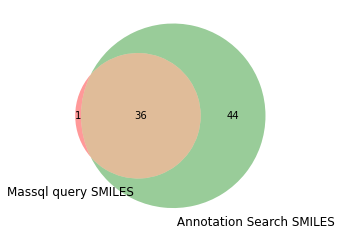

In [65]:
venn2([set(massql_query_output_matched['Smiles'].dropna().unique()), set(library_df_w_carnitine_name['Smiles'].dropna().unique())],
      set_labels = ('Massql query SMILES ', ' Annotation Search SMILES'))
plt.show()

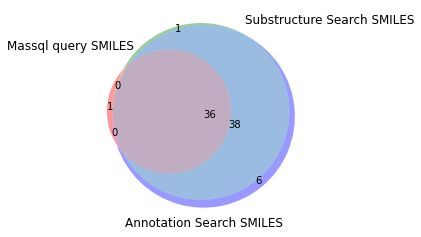

In [70]:
venn3([set(massql_query_output_matched['Smiles'].dropna().unique()),
       set(library_df_w_carnitine_substruc['Smiles'].dropna().unique()),
       set(library_df_w_carnitine_name['Smiles'].dropna().unique())],
      set_labels = ('Massql query SMILES ', 'Substructure Search SMILES', 'Annotation Search SMILES' ))
plt.show()

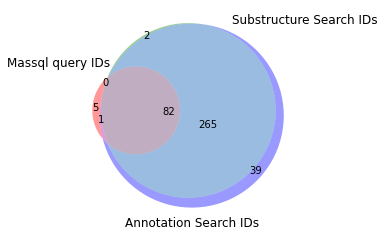

In [67]:
venn3([set(massql_query_output_matched['spectrum_id'].dropna().unique()),
       set(library_df_w_carnitine_substruc['spectrum_id'].dropna().unique()),
       set(library_df_w_carnitine_name['spectrum_id'].dropna().unique())],
      set_labels = ('Massql query IDs ', 'Substructure Search IDs', 'Annotation Search IDs' ))
plt.show()